<a href="https://colab.research.google.com/github/codingbjs/DeepLearning/blob/main/Convolutional_Neural_Network_CNN/CNN_Dogs_and_Cats_Google_Mount_GPU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import tensorflow as tf

tf.__version__

'2.13.0'

In [3]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!mkdir -p '/content/drive/MyDrive/Colab Notebooks/datasets'

In [5]:
!ls -l '/content/drive/MyDrive/Colab Notebooks/datasets/dogs_and_cats_small.zip'

-rw------- 1 root root 90618980 Oct 13 00:46 '/content/drive/MyDrive/Colab Notebooks/datasets/dogs_and_cats_small.zip'


In [6]:
!unzip -q /content/drive/MyDrive/Colab\ Notebooks/datasets/dogs_and_cats_small.zip

In [7]:
!ls -l

total 20
drwx------ 5 root root 4096 Oct 13 03:18 drive
drwxr-xr-x 1 root root 4096 Oct 11 13:23 sample_data
drwxr-xr-x 4 root root 4096 Oct 13 03:18 test
drwxr-xr-x 4 root root 4096 Oct 13 03:18 train
drwxr-xr-x 4 root root 4096 Oct 13 03:18 validation


In [8]:
train_dir = '/content/train'
valid_dir = '/content/validation'
test_dir = '/content/test'

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255)
valid_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
                  train_dir,
                  target_size = (150, 150),
                  batch_size = 20,
                  class_mode = 'binary')

valid_generator = valid_datagen.flow_from_directory(
                  valid_dir,
                  target_size = (150, 150),
                  batch_size = 20,
                  class_mode = 'binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [10]:
for data_batch, labels_batch in train_generator:
    print('배치 데이터 크기:', data_batch.shape)
    print('배치 레이블 크기:', labels_batch.shape)
    break

배치 데이터 크기: (20, 150, 150, 3)
배치 레이블 크기: (20,)


In [11]:
labels_batch

array([0., 1., 0., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1., 1., 0., 1., 1.,
       1., 0., 1.], dtype=float32)

In [12]:
from tensorflow.keras import layers
from tensorflow.keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

In [14]:
model.compile(loss = 'binary_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [15]:
%%time

Hist_dandc = model.fit(train_generator,
                       steps_per_epoch = 100,
                       epochs = 60,
                       validation_data = valid_generator,
                       validation_steps = 50)

Epoch 1/60
100/100 [==============================] - 19s 69ms/step - loss: 0.7009 - accuracy: 0.5130 - val_loss: 0.6930 - val_accuracy: 0.5000
Epoch 2/60
100/100 [==============================] - 5s 50ms/step - loss: 0.6935 - accuracy: 0.5065 - val_loss: 0.6910 - val_accuracy: 0.5150
Epoch 3/60
100/100 [==============================] - 7s 68ms/step - loss: 0.6930 - accuracy: 0.5215 - val_loss: 0.6808 - val_accuracy: 0.5680
Epoch 4/60
100/100 [==============================] - 5s 51ms/step - loss: 0.6807 - accuracy: 0.5520 - val_loss: 0.6612 - val_accuracy: 0.6230
Epoch 5/60
100/100 [==============================] - 7s 68ms/step - loss: 0.6860 - accuracy: 0.5390 - val_loss: 0.6803 - val_accuracy: 0.5570
Epoch 6/60
100/100 [==============================] - 6s 61ms/step - loss: 0.6748 - accuracy: 0.5595 - val_loss: 0.6487 - val_accuracy: 0.6170
Epoch 7/60
100/100 [==============================] - 6s 61ms/step - loss: 0.6478 - accuracy: 0.6275 - val_loss: 0.6417 - val_accuracy: 0.641

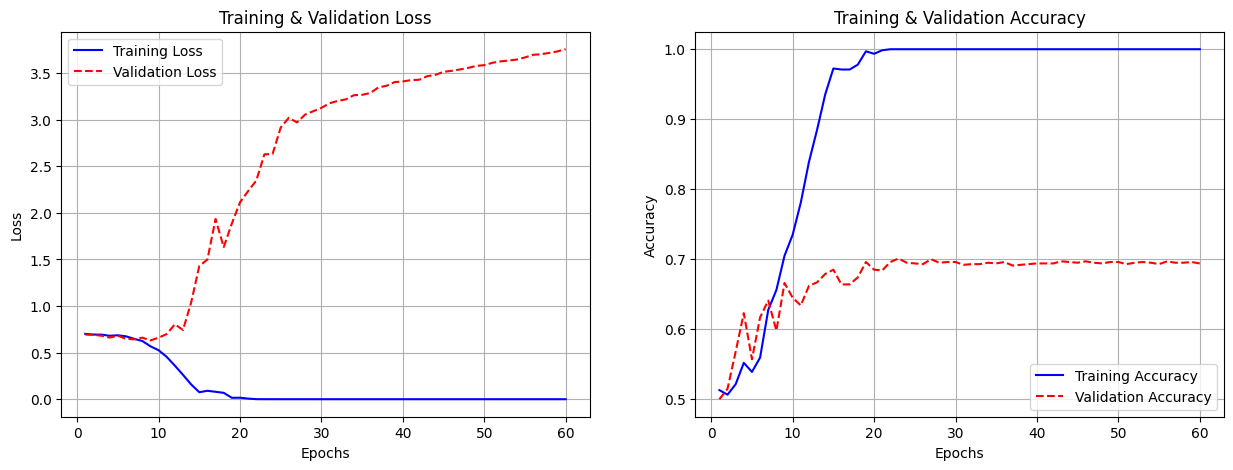

In [16]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist_dandc.history['loss']) + 1)

plt.figure(figsize = (15, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, Hist_dandc.history['loss'], 'b-')
plt.plot(epochs, Hist_dandc.history['val_loss'], 'r--')
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(epochs, Hist_dandc.history['accuracy'], 'b-')
plt.plot(epochs, Hist_dandc.history['val_accuracy'], 'r--')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.grid()

plt.show()

In [17]:
test_datagen = ImageDataGenerator(rescale = 1./255)

test_generator = test_datagen.flow_from_directory(
                 test_dir,
                 target_size = (150, 150),
                 batch_size = 20,
                 class_mode = 'binary')

Found 1000 images belonging to 2 classes.


In [18]:
loss, accuracy = model.evaluate(test_generator,
                                steps = 50,
                                verbose = 0)

print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

Loss = 4.15658
Accuracy = 0.66300


In [19]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [20]:
!mkdir -p '/content/drive/My Drive/Colab Notebooks/models'

In [21]:
model.save('/content/drive/My Drive/Colab Notebooks/models/002_dogs_and_cats_small.h5')

In [22]:
!ls -l /content/drive/My\ Drive/Colab\ Notebooks/models

total 40558
-rw------- 1 root root    34240 Oct 10 06:59 001_Model_iris.h5
-rw------- 1 root root 41496728 Oct 13 03:28 002_dogs_and_cats_small.h5


In [23]:
from tensorflow.keras.models import load_model

model_small = load_model('/content/drive/My Drive/Colab Notebooks/models/002_dogs_and_cats_small.h5')

In [24]:
loss, accuracy = model_small.evaluate(test_generator,
                                      steps = 50,
                                      verbose = 0)

print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

Loss = 4.15658
Accuracy = 0.66300
